In [24]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup

# Chrome의 경우 chromedriver의 위치를 지정해준다.
driver = webdriver.Chrome('E:/Ella/RStudio/DataAnalysis/프로젝트/chromedriver.exe')
# 암묵적으로 웹 자원 로드를 위해 3초까지 기다려 준다.
#driver.implicitly_wait(3)
time.sleep(3)

# selenium으로 url에 접근
driver.get('https://www.koreabaseball.com/History/Crowd/GraphDaily.aspx')


In [25]:
# 아이디/비밀번호를 input 에 입력(네이버 등 로그인이 필요한 경우 사용)
# driver.find_element_by_name('id').send_keys('user_id')
# driver.find_element_by_name('pw').send_keys('mypassword1234')

# select 선택
driver.find_element_by_id('cphContents_cphContents_cphContents_ddlSeason').send_keys('2019')

# 버튼 클릭
driver.find_element_by_id('cphContents_cphContents_cphContents_btnSearch').click()

time.sleep(3)

# 페이지 소스 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# driver.quit()

In [26]:
#class 이름이 tData인 table을 가져온다.
tdata = soup.find('table', {'class':'tData'})
#table에서 tbody를 찾습니다.
series = tdata.find('tbody')

#객체가 아닌 string 형태로 담아둔다.
kbdata_spec = series.text

In [30]:
#===============================================
#DataFarame으로 변경 

#tr 태그를 찾음 (tr 데이터를 여러개 찾아 리스트로 만들때 )
table_rows = tdata.find_all('tr')

#res 라는 list에 row별로 담아둔다. 
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
        
 

In [67]:
import pandas as pd 
df = pd.DataFrame(res,columns = ["date", "day", "team_1","team_2","place","number"])       
df.head()



,date,day,team_1,team_2,place,number
0,"경기수 : 720 \n경기평균 : 10,119 \n경기 합계 : 7,286,008",None,None,None,None,None
1,2019/03/23,토,두산,한화,잠실,"25,000"
2,2019/03/23,토,SK,KT,문학,"21,909"
3,2019/03/23,토,KIA,LG,광주,"20,500"
4,2019/03/23,토,NC,삼성,창원,"22,112"


In [68]:
#첫번째 열 지우기 
df = df.drop([0], axis=0)

In [69]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 720
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    720 non-null    object
 1   day     720 non-null    object
 2   team_1  720 non-null    object
 3   team_2  720 non-null    object
 4   place   720 non-null    object
 5   number  720 non-null    object
dtypes: object(6)
memory usage: 39.4+ KB


In [70]:
#데이터 타입 변경 

df['number'] = df['number'].str.strip().str.replace(',','').astype(int)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 720
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    720 non-null    datetime64[ns]
 1   day     720 non-null    object        
 2   team_1  720 non-null    object        
 3   team_2  720 non-null    object        
 4   place   720 non-null    object        
 5   number  720 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 36.6+ KB


In [71]:
df.head()

,date,day,team_1,team_2,place,number
1,2019-03-23,토,두산,한화,잠실,25000
2,2019-03-23,토,SK,KT,문학,21909
3,2019-03-23,토,KIA,LG,광주,20500
4,2019-03-23,토,NC,삼성,창원,22112
5,2019-03-23,토,롯데,키움,사직,24500


In [72]:
#관객 숫자 분포도 확인 
# 1.월별 관객수 확인

df['month'] = df['date'].dt.strftime("%m")
df.head()

#월별 그룹 
df_grp= df.groupby('month')['number'].sum()
df_grp = pd.DataFrame(df_grp)


In [49]:
df_grp

,number
month,
03,512787
04,1143807
05,1512369
06,1298825
07,850401
08,1058316
09,883580
10,25923


Text(0.5, 1.0, '월별 관객수')

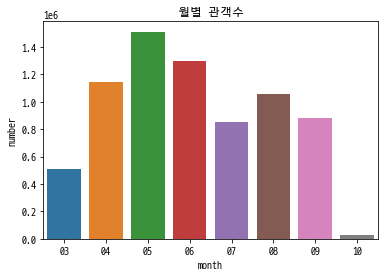

In [55]:
import seaborn as sns
import matplotlib.pylab as plt

plt.rc('font', family ='D2Coding')
sns.barplot(df_grp.index, df_grp['number'], data = df_grp )
plt.title('월별 관객수')

Text(0.5, 1.0, '구장별 관객수')

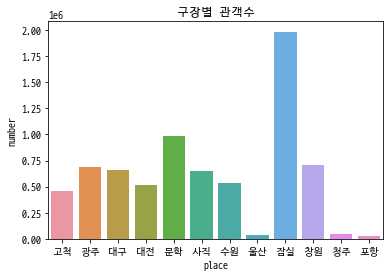

In [57]:
# 2.구장별 관객수
df_place= df.groupby('place')['number'].sum()
df_place = pd.DataFrame(df_place)
df_place

#시각화
sns.barplot(df_place.index, df_place['number'], data = df_place )
plt.title('구장별 관객수')

Text(0.5, 1.0, '요일별 관객수')

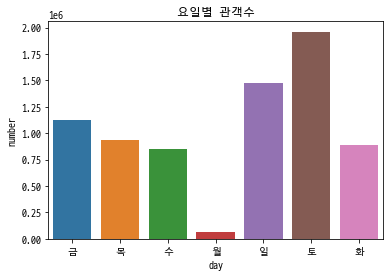

In [103]:
# 3. 요일별 관객수
df_day= df.groupby('day')['number'].sum()
df_day = pd.DataFrame(df_day)
df_day


#시각화
xlabel= ['월','화','수','목','금','토','일']
sns.barplot(df_day.index, df_day['number'], data = df_day )
plt.title('요일별 관객수')

Text(0.5, 1.0, '요일별 관객수')

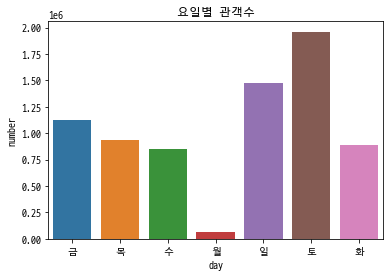

In [93]:
# 2-2. 장소별 요일에 따른 관객수
df_place_day= df.groupby(['place','day'])['number',].sum()
df_place_day = pd.DataFrame(df_day)




# #시각화
sns.barplot(df_place_day.index, df_place_day['number'], data = df_place_day )
plt.title('요일별 관객수')

Text(0, 0.5, '관객 수')

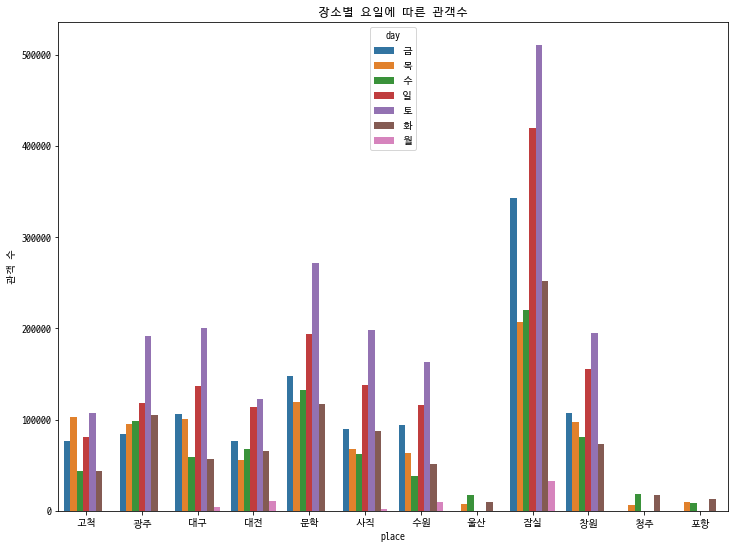

In [102]:
# 2-2. 장소별 요일에 따른 관객수
df_place_day= df.groupby(['place','day'])['number',].sum()
df_place_day = pd.DataFrame(df_place_day)

df_place_day.reset_index(level=['day'],inplace=True)

df_place_day

# #시각화
xlabel= ['월','화','수','목','금','토','일']
plt.figure(figsize=(12,9))
sns.barplot(df_place_day.index, df_place_day['number'], data = df_place_day ,hue='day')
plt.title('장소별 요일에 따른 관객수')
plt.ylabel('관객 수')

In [ ]:
# 4.일별 관객수

df['Dday'] = df['date'].dt.strftime("%d")
#날짜 분리 columnd
# df['year'] = df['date'].dt.year
# df['menth'] = df['date'].dt.menth
# df['day'] = df['date'].dt.day

df['dayofweek'] = df['date'].dt.dayofweek
print(df.head())
# df.head()

df_Dday= df.groupby('Dday')['number'].sum()
df_Dday = pd.DataFrame(df_Dday)
df_Dday

#시각화
sns.barplot(df_Dday.index, df_Dday['number'], data = df_Dday )
plt.title('일별 관객수')


In [95]:
df.head()

,date,day,team_1,team_2,place,number,month,Dday,dayofweek
1,2019-03-23,토,두산,한화,잠실,25000,03,23,5
2,2019-03-23,토,SK,KT,문학,21909,03,23,5
3,2019-03-23,토,KIA,LG,광주,20500,03,23,5
4,2019-03-23,토,NC,삼성,창원,22112,03,23,5
5,2019-03-23,토,롯데,키움,사직,24500,03,23,5
